# IMPORTS AND INSTALLS

In [114]:
#!pip3 install smogn

In [115]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import smogn

In [116]:
ss=SS()

# DATA CLEANING AND SYNTHETIC DATA PREP
**df -> synthetic dataframe**<br>
**df_org-> orginal dataframe**

In [117]:
df=pd.read_csv('C:\\Users\\KARAN\\Desktop\\diet project\\train_data_329x19.csv')
df.drop(axis=1,labels='Unnamed: 0',inplace=True)
df.dropna(axis=0,inplace=True)
df.replace(to_replace=2180.0,value=218,inplace=True)
df.reset_index(drop=True,inplace=True)
df['patient_age']=df['patient_age'].astype(int)

df= df.round(2)
x=df.iloc[:,:13]

y=df.iloc[:,18:19]


df.shape


(325, 19)

In [118]:
df.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,64,0,155.0,60.0,12.73,106.59,0.91,135.0,4.1,83.0,7.75,22.8,24.8,1800.0,246.0,30.0,60.0,3.0,7.0
1,71,1,160.0,65.0,8.30,10.60,0.56,137.0,3.6,83.0,5.91,14.7,15.1,1600.0,220.0,26.6,52.0,2.8,6.0
2,23,0,165.0,74.0,10.60,14.40,0.75,136.0,4.2,83.0,5.80,14.3,13.5,2090.0,400.0,34.8,80.0,3.0,7.0
3,41,0,169.0,97.5,6.58,102.50,2.30,132.0,3.6,83.0,8.65,11.2,10.0,1770.0,243.0,29.5,90.0,1.0,5.0
4,54,0,158.0,75.0,12.76,107.17,0.97,135.0,4.1,83.0,5.14,22.8,24.8,1800.0,247.5,30.0,66.0,3.0,4.0


In [119]:
y.describe()

,NA
count,325.000000
mean,5.673846
std,1.828637
min,0.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,8.000000


array([[<AxesSubplot:title={'center':'NA'}>]], dtype=object)

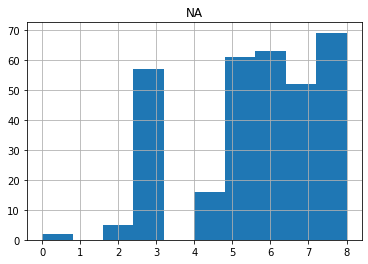

In [120]:
y.hist(bins=10)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_age     325 non-null    int32  
 1   patient_gender  325 non-null    int64  
 2   Ht              325 non-null    float64
 3   Wt              325 non-null    float64
 4   HB              325 non-null    float64
 5   UREA            325 non-null    float64
 6   CR              325 non-null    float64
 7   Na              325 non-null    float64
 8   K               325 non-null    float64
 9   FBS             325 non-null    float64
 10  HBA1C           325 non-null    float64
 11  SGOT            325 non-null    float64
 12  SGPT            325 non-null    float64
 13  calories        325 non-null    float64
 14  cho             325 non-null    float64
 15  Fat             325 non-null    float64
 16  pro             325 non-null    float64
 17  fluids          325 non-null    flo

In [122]:
df.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.00000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,55.652308,0.606154,159.876615,66.876862,13.294492,84.096277,1.038708,134.978462,4.088862,83.846154,6.49280,24.186154,26.158954,1659.036923,229.358462,27.226154,66.273846,29.055692,5.673846
std,18.460478,0.489355,6.428141,9.200941,2.177099,36.993946,0.794877,2.754821,0.350768,10.946321,1.91834,10.665496,12.622462,247.451152,31.447315,3.823283,7.452448,136.173058,1.828637
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.60000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,43.000000,0.000000,156.000000,63.000000,12.300000,41.400000,0.860000,135.000000,4.100000,83.000000,5.29000,22.800000,24.800000,1520.000000,209.000000,25.000000,62.000000,2.500000,5.000000
50%,58.000000,1.000000,160.000000,68.000000,13.700000,106.040000,0.890000,135.000000,4.100000,83.000000,5.80000,22.800000,24.800000,1610.000000,221.000000,26.800000,67.000000,2.900000,6.000000
75%,70.000000,1.000000,163.500000,71.700000,14.800000,106.970000,0.960000,135.000000,4.100000,83.000000,6.97000,22.800000,24.800000,1820.000000,250.000000,30.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.60000,133.000000,170.000000,2500.000000,400.000000,42.000000,90.000000,800.000000,8.000000


# TEST TRAIN SPLIT

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2);

In [124]:
lr=LinearRegression(fit_intercept=True)
en=ElasticNet()
rf=RandomForestRegressor(n_estimators=500,max_depth=3,criterion='absolute_error')
ab=AdaBoostRegressor(n_estimators=100)
gb=GradientBoostingRegressor(n_estimators=100,max_depth=3)
pca=PCA(whiten=True)
lda=LDA()
gpr=GaussianProcessRegressor(kernel=WhiteKernel()+DotProduct())
lgr=LogisticRegression()
svr=SVR(gamma='auto',kernel='rbf')

In [125]:
lr.fit(x_train,y_train.values.ravel())
en.fit(x_train,y_train.values.ravel())
rf.fit(x_train,y_train.values.ravel())
ab.fit(x_train,y_train.values.ravel())
gb.fit(x_train,y_train.values.ravel())
pca.fit(x_train,y_train.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(x_train,y_train.values.ravel())
svr.fit(x_train,y_train.values.ravel())

SVR(gamma='auto')

# TRAIN ACC WITH ORGINAL DATASET

In [126]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(x_train,y_train.values.ravel()))
print('ElasticNet acc: ',en.score(x_train,y_train.values.ravel()))
print('RandomForest acc: ',rf.score(x_train,y_train.values.ravel()))
print('AdaBoost acc: ',ab.score(x_train,y_train.values.ravel()))
print('GradientBoost acc: ',gb.score(x_train,y_train.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_train,y_train.values.ravel()))+"\n")

print("PCA acc: ",pca.score(x_train,y_train.values.ravel()))
print("GPR acc: ",gpr.score(x_train,y_train.values.ravel()))
print("SVR acc: ",svr.score(x_train,y_train.values.ravel()))


TRAIN ACC:
LR acc:  0.5826686159575674
ElasticNet acc:  0.561878273717586
RandomForest acc:  0.6868097974266465
AdaBoost acc:  0.7460769083058882
GradientBoost acc:  0.9216336595361581
PCA acc:  -55.607335851636456
GPR acc:  0.5824752781671065
SVR acc:  0.743672420186748


# TEST ACC AFTER TRAIN WITH ORGINAL DATASET

In [127]:
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))


TEST ACC:
LR acc:  0.4822076846636033
ElasticNet acc:  0.46908407358198445
RandomForest acc:  0.4668683546875
AdaBoost acc:  0.5154499541193852
GradientBoost acc:  0.4809001716754596
PCA acc:  -52.33298408507209
GPR acc:  0.4816627062255395
SVR acc:  0.10766117621988569


# RMSE WHEN PREDICTING WITH ACTUAL DATA

In [128]:

print('LR acc: ',metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)
print('ElasticNet acc: ',metrics.mean_squared_error(y_test,en.predict(x_test))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_test,rf.predict(x_test))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_test,ab.predict(x_test))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_test,gb.predict(x_test))**0.5)

#fh.write("Gradient Boosting acc: "+str(metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)+"\n")
#print("PCA acc: ",metrics.mean_squared_error(y_test,pca.predict(x_test)**0.5))
#print("GPR acc: ",metrics.mean_squared_error(y_test,gpr.predict(x_test)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_test,svr.predict(x_test)**0.5))

LR acc:  1.4003107892890678
ElasticNet acc:  1.4179454110796905
RandomForest acc:  1.4209011495959447
AdaBoost acc:  1.3546152303402557
GradientBoost acc:  1.4020776851070638
SVR acc:  13.355437427619563


# CONCLUSION:
- Support Vectors and Random Forest perform better
- training with synthetic data and predicting with the actual data provides better results than just training and predicting with the original dataset 

# synthetic dat


#  FT selection

In [129]:
rfe=RFE(rf,n_features_to_select=None)
rfe.fit(result_x,result_y)

c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\feature_sel

RFE(estimator=RandomForestRegressor(criterion='absolute_error', max_depth=3,
                                    n_estimators=500))

In [130]:
rfe.ranking_
#array([1, 7, 1, 1, 1, 1, 1, 2, 6, 4, 1, 5, 3])
#array([1, 7, 3, 4, 1, 1, 1, 1, 5, 8, 1, 6, 2])
#array([1, 8, 1, 6, 2, 5, 1, 1, 1, 3, 1, 7, 4])

array([1, 5, 4, 2, 1, 3, 1])

In [131]:
result_x

,patient_age,Ht,HB,UREA,CR,Na,HBA1C
0,49,156.3,13.68,92.37,0.63,135.0,8.65
1,29,146.9,14.44,102.56,1.48,138.0,7.60
2,75,159.2,16.08,121.59,2.29,139.0,6.97
3,28,161.1,15.96,119.02,1.57,135.0,5.14
4,44,156.1,9.97,31.78,1.14,134.0,5.24
...,...,...,...,...,...,...,...
253,67,154.5,13.79,107.79,1.00,135.0,8.99
94,70,155.0,12.60,15.40,0.58,130.0,6.20
308,84,154.0,12.95,107.16,0.96,135.0,6.23
131,38,165.0,13.40,19.30,0.86,133.0,5.87


In [132]:
from sdv.tabular import GaussianCopula

In [133]:
model = GaussianCopula(
    field_distributions={
        'weight': 'gamma',
        'UREA': 'gaussian_kde',
        'HB': 'gaussian_kde',
        'K': 'truncated_gaussian',
        'HBA1C': 'gaussian_kde',
        'SGOT': 'gaussian_kde',
        'SGPT': 'gaussian_kde',

    }
)
model.fit(df)
# dropping 

In [134]:
sample = model.sample(500)
sample.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,79,1,143.8,54.34,15.39,119.89,1.16,134.0,3.84,87.0,5.58,25.7,25.52,1274.0,191.4,22.5,53.0,75.5,5.0
1,65,1,160.4,68.28,13.23,84.44,0.68,137.0,3.90,91.0,6.82,26.3,26.01,1820.0,232.3,32.1,76.0,75.2,5.0
2,51,1,155.1,52.68,13.15,58.60,1.57,134.0,3.98,87.0,8.78,21.6,25.96,1197.0,196.0,23.0,63.0,163.1,3.0
3,25,0,148.3,54.36,12.57,99.81,0.63,131.0,3.90,88.0,6.33,23.0,25.80,1954.0,263.5,33.0,58.0,36.3,8.0
4,42,1,159.9,58.76,15.48,115.10,1.79,131.0,3.82,93.0,10.05,23.4,31.66,1917.0,252.9,32.5,61.0,60.0,6.0


In [135]:
df.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.00000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,55.652308,0.606154,159.876615,66.876862,13.294492,84.096277,1.038708,134.978462,4.088862,83.846154,6.49280,24.186154,26.158954,1659.036923,229.358462,27.226154,66.273846,29.055692,5.673846
std,18.460478,0.489355,6.428141,9.200941,2.177099,36.993946,0.794877,2.754821,0.350768,10.946321,1.91834,10.665496,12.622462,247.451152,31.447315,3.823283,7.452448,136.173058,1.828637
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.60000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,43.000000,0.000000,156.000000,63.000000,12.300000,41.400000,0.860000,135.000000,4.100000,83.000000,5.29000,22.800000,24.800000,1520.000000,209.000000,25.000000,62.000000,2.500000,5.000000
50%,58.000000,1.000000,160.000000,68.000000,13.700000,106.040000,0.890000,135.000000,4.100000,83.000000,5.80000,22.800000,24.800000,1610.000000,221.000000,26.800000,67.000000,2.900000,6.000000
75%,70.000000,1.000000,163.500000,71.700000,14.800000,106.970000,0.960000,135.000000,4.100000,83.000000,6.97000,22.800000,24.800000,1820.000000,250.000000,30.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.60000,133.000000,170.000000,2500.000000,400.000000,42.000000,90.000000,800.000000,8.000000


In [136]:
sample.describe()


,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,54.202000,0.524000,159.271600,66.487180,13.188200,80.567860,1.310380,134.740000,4.088760,91.508000,6.531980,24.421000,26.322700,1664.534000,230.178200,27.321000,66.180000,108.476400,5.744000
std,18.235522,0.499924,6.201942,8.747678,2.326574,39.708339,0.598718,2.761821,0.342225,6.485836,1.922708,10.191514,11.465861,249.651125,31.992077,3.897096,7.177928,82.575488,1.706543
min,11.000000,0.000000,143.200000,37.810000,6.580000,10.000000,0.530000,127.000000,2.970000,83.000000,4.600000,7.500000,6.700000,763.000000,164.500000,11.500000,46.000000,1.200000,0.000000
25%,41.000000,0.000000,155.200000,60.057500,11.997500,36.825000,0.840000,133.000000,3.847500,86.000000,5.200000,20.000000,21.552500,1482.750000,206.100000,24.600000,61.000000,42.200000,5.000000
50%,54.000000,1.000000,158.900000,66.095000,13.580000,98.465000,1.150000,135.000000,4.090000,90.000000,5.940000,22.950000,25.020000,1651.500000,228.350000,27.100000,66.000000,91.050000,6.000000
75%,68.000000,1.000000,162.925000,72.575000,14.772500,109.725000,1.690000,137.000000,4.330000,95.000000,7.035000,25.500000,28.435000,1846.250000,251.075000,29.800000,71.000000,160.975000,7.000000
max,93.000000,1.000000,178.500000,89.980000,17.300000,200.700000,3.270000,144.000000,5.110000,114.000000,14.600000,96.400000,169.860000,2438.000000,330.100000,38.700000,85.000000,459.600000,8.000000


In [137]:
sample_x=sample.iloc[:,:13]
sample_y=sample.iloc[:,18:]

In [138]:
sample_y

,NA
0,5.0
1,5.0
2,3.0
3,8.0
4,6.0
...,...
495,8.0
496,6.0
497,7.0
498,5.0


In [139]:
frames_x = [sample_x,x_train]
frames_y = [sample_y,y_train]
result_x = pd.concat(frames_x)
result_y = pd.concat(frames_y)

In [140]:
result_x.shape

(760, 13)

In [141]:
lr.fit(result_x,result_y.values.ravel())
en.fit(result_x,result_y.values.ravel())
rf.fit(result_x,result_y.values.ravel())
ab.fit(result_x,result_y.values.ravel())
gb.fit(result_x,result_y.values.ravel())
pca.fit(result_x,result_y.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(result_x,result_y.values.ravel())
svr.fit(result_x,result_y.values.ravel())

SVR(gamma='auto')

In [142]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(result_x,result_y.values.ravel()))
print('ElasticNet acc: ',en.score(result_x,result_y.values.ravel()))
print('RandomForest acc: ',rf.score(result_x,result_y.values.ravel()))
print('AdaBoost acc: ',ab.score(result_x,result_y.values.ravel()))
print('GradientBoost acc: ',gb.score(result_x,result_y.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(result_x,result_y.values.ravel()))+"\n")

print("PCA acc: ",pca.score(result_x,result_y.values.ravel()))
print("GPR acc: ",gpr.score(result_x,result_y.values.ravel()))
print("SVR acc: ",svr.score(result_x,result_y.values.ravel()))


TRAIN ACC:
LR acc:  0.47802829360947874
ElasticNet acc:  0.4475500632651104
RandomForest acc:  0.5006740465012554
AdaBoost acc:  0.4971642356980913
GradientBoost acc:  0.7372651215938884
PCA acc:  -55.10973974884975
GPR acc:  0.4779880337449751
SVR acc:  0.6560696142370921


In [143]:
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))


TEST ACC:
LR acc:  0.4696426721420528
ElasticNet acc:  0.4530420357350424
RandomForest acc:  0.4723891053124999
AdaBoost acc:  0.3974802205520339
GradientBoost acc:  0.5026984675573108
PCA acc:  -51.07604111012648
GPR acc:  0.4693206003159148
SVR acc:  0.08594002372665865


AFTER FT SELECTION


In [149]:
#AFTER FT SELECTION
result_x.drop(axis=1,labels=['patient_gender','Wt','K','FBS','SGOT','SGPT'],inplace=True)
x_test.drop(axis=1,labels=['patient_gender','Wt','K','FBS','SGOT','SGPT'],inplace=True)
x_train.drop(axis=1,labels=['patient_gender','Wt','K','FBS','SGOT','SGPT'],inplace=True)



ON NORMAL DATA


In [150]:
lr.fit(x_train,y_train.values.ravel())
en.fit(x_train,y_train.values.ravel())
rf.fit(x_train,y_train.values.ravel())
ab.fit(x_train,y_train.values.ravel())
gb.fit(x_train,y_train.values.ravel())
pca.fit(x_train,y_train.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(x_train,y_train.values.ravel())
svr.fit(x_train,y_train.values.ravel())

SVR(gamma='auto')

In [151]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(x_train,y_train.values.ravel()))
print('ElasticNet acc: ',en.score(x_train,y_train.values.ravel()))
print('RandomForest acc: ',rf.score(x_train,y_train.values.ravel()))
print('AdaBoost acc: ',ab.score(x_train,y_train.values.ravel()))
print('GradientBoost acc: ',gb.score(x_train,y_train.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_train,y_train.values.ravel()))+"\n")

print("PCA acc: ",pca.score(x_train,y_train.values.ravel()))
print("GPR acc: ",gpr.score(x_train,y_train.values.ravel()))
print("SVR acc: ",svr.score(x_train,y_train.values.ravel()))
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

TRAIN ACC:
LR acc:  0.5742433312831461
ElasticNet acc:  0.5598192150744697
RandomForest acc:  0.6828353763391377
AdaBoost acc:  0.7010320424543857
GradientBoost acc:  0.9239451440087478
PCA acc:  -28.544529097830335
GPR acc:  0.5740925982340352
SVR acc:  0.7590669640762627
TEST ACC:


In [152]:

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))

LR acc:  0.48669830760601873
ElasticNet acc:  0.47234060557790836
RandomForest acc:  0.4755496653125
AdaBoost acc:  0.48873168315359405
GradientBoost acc:  0.4956658363048627
PCA acc:  -27.89471324815589
GPR acc:  0.48666762035083655
SVR acc:  0.14710829103509415


In [153]:

print('LR acc: ',metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)
print('ElasticNet acc: ',metrics.mean_squared_error(y_test,en.predict(x_test))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_test,rf.predict(x_test))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_test,ab.predict(x_test))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_test,gb.predict(x_test))**0.5)
print("GPR acc: ",metrics.mean_squared_error(y_test,gpr.predict(x_test)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_test,svr.predict(x_test)**0.5))

LR acc:  1.3942253753362994
ElasticNet acc:  1.4135900254110627
RandomForest acc:  1.4092849632676523
AdaBoost acc:  1.3914611170019813
GradientBoost acc:  1.381992954119529
GPR acc:  13.130723868421507
SVR acc:  13.378846090065469


on synthetic data

In [154]:
lr.fit(result_x,result_y.values.ravel())
en.fit(result_x,result_y.values.ravel())
rf.fit(result_x,result_y.values.ravel())
ab.fit(result_x,result_y.values.ravel())
gb.fit(result_x,result_y.values.ravel())
pca.fit(result_x,result_y.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
gpr.fit(result_x,result_y.values.ravel())
svr.fit(result_x,result_y.values.ravel())

SVR(gamma='auto')

In [155]:
print("TRAIN ACC:")
#fh.write("TRAIN ACC - BEFORE FEATURE SELECTION:\n")
print('LR acc: ',lr.score(result_x,result_y.values.ravel()))
print('ElasticNet acc: ',en.score(result_x,result_y.values.ravel()))
print('RandomForest acc: ',rf.score(result_x,result_y.values.ravel()))
print('AdaBoost acc: ',ab.score(result_x,result_y.values.ravel()))
print('GradientBoost acc: ',gb.score(result_x,result_y.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(result_x,result_y.values.ravel()))+"\n")

print("PCA acc: ",pca.score(result_x,result_y.values.ravel()))
print("GPR acc: ",gpr.score(result_x,result_y.values.ravel()))
print("SVR acc: ",svr.score(result_x,result_y.values.ravel()))


TRAIN ACC:
LR acc:  0.47037066392908444
ElasticNet acc:  0.4456989721994148
RandomForest acc:  0.4923208601099881
AdaBoost acc:  0.4812006591169127
GradientBoost acc:  0.7312127665765873
PCA acc:  -28.57067182866491
GPR acc:  0.4703380610667556
SVR acc:  0.6689596392010859


In [156]:
print("TEST ACC:")
#fh.write("TEST ACC - BEFORE FEATURE SELECTION:\n")

print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#fh.write("Gradient Boosting acc: "+str(gb.score(x_test,y_test.values.ravel()))+"\n")
print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))


TEST ACC:
LR acc:  0.4748653624329755
ElasticNet acc:  0.4527985358194714
RandomForest acc:  0.4647552371875
AdaBoost acc:  0.4014385146489523
GradientBoost acc:  0.5051643014530249
PCA acc:  -27.74329376741087
GPR acc:  0.474778862985745
SVR acc:  0.14210288756547684


In [157]:

print('LR acc: ',metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)
print('ElasticNet acc: ',metrics.mean_squared_error(y_test,en.predict(x_test))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_test,rf.predict(x_test))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_test,ab.predict(x_test))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_test,gb.predict(x_test))**0.5)
print("GPR acc: ",metrics.mean_squared_error(y_test,gpr.predict(x_test)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_test,svr.predict(x_test)**0.5))

LR acc:  1.4102040811704095
ElasticNet acc:  1.4395284753057869
RandomForest acc:  1.4237143025848322
AdaBoost acc:  1.5055702307340586
GradientBoost acc:  1.3689170925705254
GPR acc:  13.155415004424311
SVR acc:  13.25728444248689


## synthetic data gives less overfitting, slightly higher test accuracy and a lower mean square err